# Demo Brain Visualization

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from analysis.io import Data
data = Data()
file = data.load('data/demirtas_neuron_2019.hdf5')
t1wt2w = file['t1wt2w'][()]
file.close()

## Ploting using workbench wrapper
A straight-forward plotting approach is to execute `workbench` from Python and show the screenshot of a prepared scene. Here the scene was generated and stored in templated folder:

In [4]:
from visualization.brain_wb import plot_brain

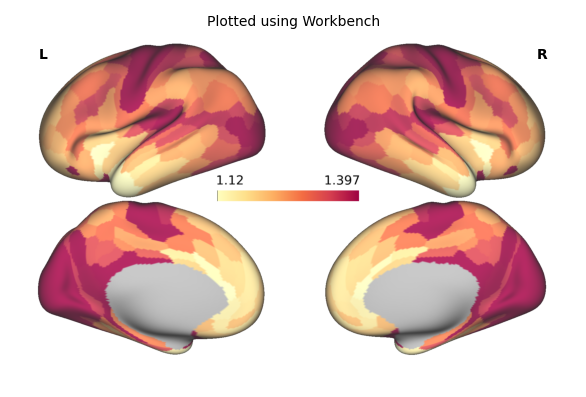

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=100)
plot_brain(ax, data=t1wt2w, hemi_label=True, title='Plotted using Workbench')

## Using Mayavi
Another approach is to use Mayavi to plot the cortical surface. The advantage of this approach is that it is possible to use functions of `matplotlib` and customize the scripts. Nevertheless Mayavi can be dificult to install and has stability issues (at least in Mac).

First create a brain object:

In [4]:
from visualization.brain_view import Brain
brain_object = Brain()

Then plot on any axis that we generate:

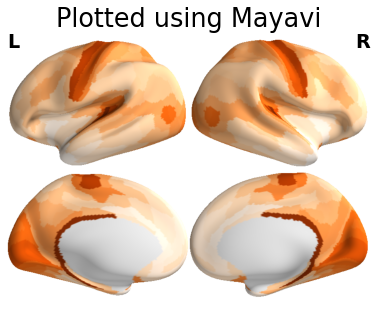

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
brain_object.plot(ax, t1wt2w, cmap = 'Oranges', title = 'Plotted using Mayavi')

Change colormap:

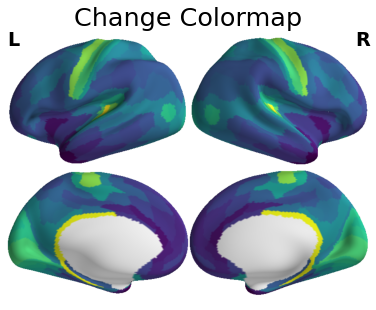

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
brain_object.plot(ax, t1wt2w, cmap = 'viridis', title = 'Change Colormap')

Modifying the range of colormap or add borders (one can add borders to any parcel)

In [6]:
from scipy.stats import zscore
import numpy as np

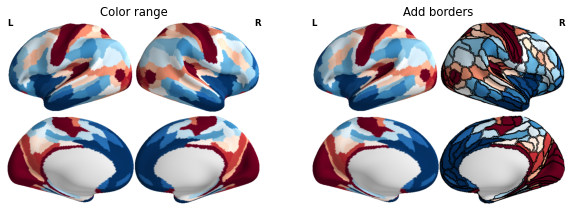

In [8]:
borders = np.zeros(360)
borders[:180] = 1.0
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
brain_object.plot(ax[0], zscore(t1wt2w), cmap = 'RdBu_r', vrange=[-1.0, 1.0], title = 'Color range')
brain_object.plot(ax[1], zscore(t1wt2w), cmap = 'RdBu_r', vrange=[-1.0, 1.0], title = 'Add borders', borders = borders)

It generates `very inflated` Conte69 surface template, but it is possible to use `inflated` or `midthickness` surface templates:

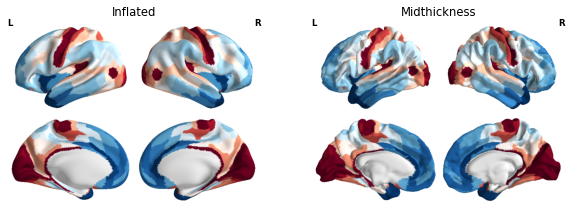

In [10]:
brain_inflated = Brain(surface = 'inflated')
brain_midthickness = Brain(surface = 'midthickness')

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
brain_inflated.plot(ax[0], zscore(t1wt2w), cmap = 'RdBu_r', vrange=[-1.5, 1.5], title = 'Inflated')
brain_midthickness.plot(ax[1], zscore(t1wt2w), cmap = 'RdBu_r', vrange=[-1.5, 1.5], title = 'Midthickness')

Apart from `Glasser-360` parcellation, it is possible to choose `Yeo 17 Networks` or `Desikan-Killiany` (freesurfer-aparc) templates. One can add more templates to work with.

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


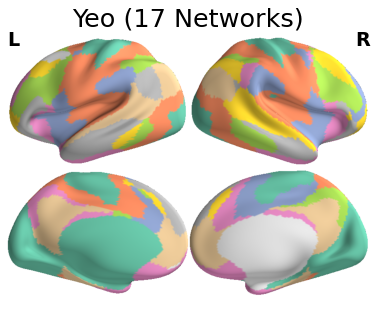

In [30]:
brain_yeo = Brain(parc='yeo')
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
indices = np.hstack((np.arange(52), np.arange(54)))
brain_yeo.plot(ax, indices, cmap = 'Set2', title = 'Yeo (17 Networks)')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


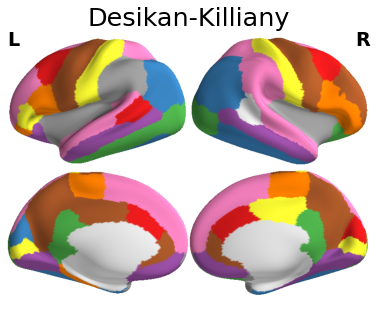

In [31]:
brain_aparc = Brain(parc='aparc')
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
indices = np.hstack((0, np.arange(34), np.arange(34)))
brain_aparc.plot(ax, indices, cmap = 'Set1', title = 'Desikan-Killiany')

### Todos:
- Add option to include colorbar
- Convert Cifti1 to Cifti2 format